In [171]:
import pandas as pd
import numpy as np

# Les skills (tagged)

In [172]:
skills = set(sorted(pd.read_csv("tagged.txt", header=None)[0]))

In [249]:
import re
TextPeriodToPeriodMultiplier = {
        'par an': 1,
        'par mois': 12,
        'par semaine': 4*12,
        'par jour': 20*12,
        'par heure': 35 * 4 *12
    }

def parse_salary(salary):
    # cherche le multiplier qui convertira le salaire(period) en un salaire par an
    multiplier = 1
    for textPeriod, periodMultiplier in TextPeriodToPeriodMultiplier.items():
        if textPeriod in salary:
            multiplier = periodMultiplier
            break
    
    # Supprime les espaces dans les valeurs de salaires
    sal = salary.replace(' ', '')
    salaryValues = re.findall('\d+', sal)
    
    isFourchette = '-' in salary;
    if isFourchette:
        result = [int(salaryValues[0]) * multiplier, int(salaryValues[1]) * multiplier] 
    else:
        result = (int(salaryValues[0]) * multiplier)
        
    return result
     

# Data

In [174]:
data = pd.read_json("./BDD_14_10_2019.json", lines=True, encoding='utf8')
data

,Date_de_publication,Descriptif_du_poste,Entreprise,Salaire,Scrapped_job,Scrapped_location,Titre,Type_de_contrat,Ville,_id
0,il y a 4 jours,#JobAlert #Stats #DataScientist #Nantes #Mérie...,SILLIKER - MERIEUX NUTRISCIENCES FRANCE,40 000 € par an,data scientist,Nantes,Data Scientist H/F - BIOFORTIS - CDI - Saint-H...,None,Saint-Herblain (44),{'$oid': '5d9b7361130e0588f823d767'}
1,il y a 4 jours,"A ce titre, vos principales missions sont les ...",Page Personnel,None,data scientist,Nantes,Data Scientist en Pistage H/F,None,Nantes (44),{'$oid': '5d9b7361130e0588f823d768'}
2,il y a 4 jours,LE LEADER FRANCAIS DE LA DATA RECRUTE.Rejoindr...,Umanis,None,data scientist,Nantes,CONSULTANT DATA SCIENCE H/F RENNES,None,Loire-Atlantique,{'$oid': '5d9b7362130e0588f823d769'}
3,il y a 4 jours,Le programme data du groupe Maisons du Monde a...,Maisons du Monde,None,data scientist,Nantes,Data scientist (h/f) - Nantes,None,Vertou (44),{'$oid': '5d9b7363130e0588f823d76a'}
4,il y a 4 jours,"KANDY, basée à Treillières, près de Nantes (44...",KANDY,30 000 € - 40 000 € par an,data scientist,Nantes,Data Scientist H/F,None,Treillières (44),{'$oid': '5d9b7363130e0588f823d76b'}
5,il y a 4 jours,"A compétences égales, le poste est ouvert aux ...",EPSILON-ALCEN,30 000 € - 50 000 € par an,data scientist,Nantes,Ingénieur Data Scientist H/F,None,Nantes (44),{'$oid': '5d9b7364130e0588f823d76c'}
6,il y a 4 jours,"Naval Group, leader européen du naval de défen...",Naval Group,None,data scientist,Nantes,Data Scientist en Pistage H/F,None,Nantes (44),{'$oid': '5d9b7365130e0588f823d76d'}
7,il y a 4 jours,"A ce titre, vos principales missions sont les ...",Page Personnel FR,None,data scientist,Nantes,"Data Scientist en Pistage H/F - Naval Group, l...",None,Nantes (44),{'$oid': '5d9b7366130e0588f823d76e'}
8,il y a 4 jours,THE FRENCH LEADER OF THE DATA RECRUITS.\nJoini...,Umanis,None,data scientist,Nantes,DATA SCIENTIST confirmé H/F NANTES,None,Saint-Herblain (44),{'$oid': '5d9b7367130e0588f823d76f'}
9,il y a 4 jours,Contexte du poste :\nLa donnée vous inspire ? ...,ippon,None,data scientist,Nantes,Consultant Data (h/f),None,Nantes (44),{'$oid': '5d9b7367130e0588f823d770'}


In [175]:
#nombre de lignes avec salaire fixe
salary_without_range = []

for sal in data['Salaire']:
    if (sal != 'None') & ('-' not in sal):
        salary_without_range.append(sal)
        #print(sal)

len(salary_without_range)

761

In [176]:
#to list

list_data = data.values.tolist()

In [177]:
#prends les colonnes description du poste et les salaires

mydata = [[ligne[3],ligne[1]] for ligne in list_data]
len(mydata)

13289

In [178]:
#filtrer seulement les dannonces qui ont une description et un salaire

filtered = list(filter(lambda x: not (x[0]=="None" or x[1]=="None") , mydata))
len(filtered)

2249

In [229]:
from gensim.utils import tokenize

#je tokenise la colonne description et je soustrait les skills + colonnes salaire, parse_salary et description
skills_extrated = list(map(lambda x: [x[0],parse_salary(x[0]),skills.intersection(set(tokenize(x[1],lowercase=True))), x[1] ], filtered))

# j'enlève les lignes qui ont 0 skills trouvées
skills_extrated  = list(filter(lambda x: len(x[2]) > 0 ,skills_extrated))
print(len(skills_extrated))

# recupère uniquement la colone skills
full_skills_list =list(map(lambda x: x[2], skills_extrated))

pd.DataFrame(skills_extrated)


2112


,0,1,2,3
0,40 000 € par an,40000,"{svm, r, python, shiny, workflows, learning, s...",#JobAlert #Stats #DataScientist #Nantes #Mérie...
1,30 000 € - 40 000 € par an,"[30000, 40000]","{network, hadoop, learning, readr, statistique...","KANDY, basée à Treillières, près de Nantes (44..."
2,30 000 € - 50 000 € par an,"[30000, 50000]","{css, network, lstm, hadoop, rnn, learning, st...","A compétences égales, le poste est ouvert aux ..."
3,40 000 € par an,40000,"{svm, r, python, shiny, workflows, learning, s...",#JobAlert #Stats #DataScientist #Nantes #Mérie...
4,30 000 € - 50 000 € par an,"[30000, 50000]","{css, network, lstm, hadoop, rnn, learning, st...","A compétences égales, le poste est ouvert aux ..."
5,30 000 € - 45 000 € par an,"[30000, 45000]","{perl, scrum, cloud, scripting}","Votre Rôle, vos Responsabilités\nNous menons u..."
6,420 € par semaine,20160,"{c, sql, r, etl}",Acteur européen de la transformation numérique...
7,44 000 € par an,44000,"{cloudera, spark, ia, hadoop}",Vous rejoindrez BEWIZYU dans un contexte de fo...
8,32 000 € - 45 000 € par an,"[32000, 45000]","{c, javascript, agile, cloud, scrum, learning,...",Capgemini recrute plusieurs développeurs JAVA ...
9,40 000 € - 50 000 € par an,"[40000, 50000]","{autoscaling, javascript, cloud, aws, devops, ...",Seyos est un cabinet de recrutement spécialisé...


In [230]:
# applatissement de tout les skills avec doublons
#pour chaque ligne dans mon tableau full_skills_list parcours et pour chaque ligne parcours les skills et garde skills
skills_flatten = [skill for skills_line in full_skills_list for skill in skills_line]

In [231]:
#compte le nombre d'occurence d'un skill dans toutes les skills détectées
#renvoie un tuple avec le nombre de skills et le nom du skill
skillsByOcc = [(skills_flatten.count(skill), skill) for skill in set(skills_flatten)]

In [232]:
#visualiser l'occurence des skills 
#trier par la première colonne
skillsByOcc = sorted(skillsByOcc, key=lambda l: l[0] , reverse=True)

pd.DataFrame(skillsByOcc).to_csv('skills_by_occurrence.csv')

skillsByOcc

[(821, 'c'),
 (650, 'agile'),
 (595, 'javascript'),
 (451, 'sql'),
 (444, 'php'),
 (422, 'html'),
 (399, 'git'),
 (397, 'css'),
 (363, 'js'),
 (343, 'angular'),
 (314, 'r'),
 (313, 'python'),
 (300, 'scrum'),
 (274, 'framework'),
 (267, 'cloud'),
 (265, 'react'),
 (264, 'mysql'),
 (214, 'symfony'),
 (184, 'devops'),
 (180, 'jenkins'),
 (163, 'postgresql'),
 (159, 'jquery'),
 (153, 'nodejs'),
 (146, 'ux'),
 (146, 'aws'),
 (140, 'node'),
 (137, 'learning'),
 (126, 'crm'),
 (107, 'kubernetes'),
 (107, 'android'),
 (105, 'erp'),
 (103, 'elasticsearch'),
 (103, 'mvc'),
 (103, 'reactjs'),
 (102, 'gitlab'),
 (98, 'oracle'),
 (90, 'jira'),
 (84, 'mongodb'),
 (82, 'bootstrap'),
 (82, 'hibernate'),
 (80, 'spark'),
 (80, 'github'),
 (79, 'typescript'),
 (74, 'bdd'),
 (73, 'angularjs'),
 (71, 'vuejs'),
 (71, 'analytics'),
 (69, 'scala'),
 (69, 'etl'),
 (63, 'nosql'),
 (63, 'kanban'),
 (63, 'wordpress'),
 (62, 'hadoop'),
 (61, 'jee'),
 (58, 'webservices'),
 (53, 'laravel'),
 (50, 'ia'),
 (48, 'grap

# Stats

In [234]:
from statistics import mean, stdev

skills_set = set(skills_flatten)

skill_with_stat = []
for s in skillsByOcc:
    #cherche dans la description chaque skill et s'il trouve il renvoie la colonne salaire
    salaries_list_for_current_skill = [se[1] for se in skills_extrated if s[1] in se[2]]
    salaries = []
    #je parcours chaque salaire que j'ai eu et je le mets dans salaire
    for sa in salaries_list_for_current_skill:
        #si c'est un seul entier (salaire fixe) j'ajoute le même pour les deux colonnes
        if type(sa) == int:
            salaries.append(sa)
            salaries.append(sa) #attention biais
        else:
            #s'il y a une borne
            if type(sa) == list:
                salaries.append(sa[0]) #j'ajoute borne 1
                salaries.append(sa[1]) #j'ajoute la borne 2
    #si mon skill n'a pas plus que 10 annonce il l'exclue
    if len(salaries)>10:
        #filtre : enlève les salaires en dessous de 20000
        salaries =  list(filter(lambda x: x > 20000 ,salaries))
        #skill, cherche dans salaire le min, max, std, nb d'annonce qui ont cet skill 
        ecart = max(salaries)- min(salaries)

        skill_with_stat.append([s[1],min(salaries), max(salaries), int(mean(salaries)), int(stdev(salaries)), ecart, len(salaries_list_for_current_skill) ])   
    
    
df_skills_stats = pd.DataFrame(skill_with_stat)

df_skills_stats = df_skills_stats.set_axis(['skill', 'min', 'max', 'mean', 'stdev','plage', 'nb annonces'], axis=1, inplace=False)
df_skills_stats.to_csv("skills_stats_for_dataset_BDD_14_10_2019.csv")
df_skills_stats

,skill,min,max,mean,stdev,plage,nb annonces
0,c,20160,132000,42457,12099,111840,821
1,agile,20640,120000,44908,12529,99360,650
2,javascript,20640,120000,42549,12251,99360,595
3,sql,20160,120000,43293,13505,99840,451
4,php,20160,92400,39876,9261,72240,444
5,html,20160,80000,39743,10143,59840,422
6,git,20640,100800,41653,11178,80160,399
7,css,20160,84000,39870,9951,63840,397
8,js,20160,109200,44075,11229,89040,363
9,angular,20640,132000,43787,13333,111360,343


## Calculer les coef et proba des skills

In [235]:
#calcul des écarts (minimun et maximun général de toutes les skills) de tous les minimuns et de tous les maximuns
ecarts = [d[5] for d in df_skills_stats.values]
min_e = min(ecarts)
max_e = max(ecarts)

#sum de colonne max
sum_max = sum([d[2] for d in df_skills_stats.values])
#sum de colonne min
sum_min =  sum([d[1] for d in df_skills_stats.values])

sum_ecarts =  sum([(ecart-min_e) / (max_e - min_e) for ecart in ecarts])

print(f"plage d'ecart min {min_e}€ max {max_e}€")

#new dataframe final
df_final = df_skills_stats.copy()

#j'ajoute la colonne coef à la position 6
df_final.insert(6, 'coef', [(ecart-min_e) / (max_e - min_e) for ecart in ecarts], True)

#j'ajoute la colonne proba à la position 7
df_final.insert(7, 'proba', [ecart / (sum_max - sum_min) for ecart in ecarts], True)

df_final.insert(8, 'coef-inversé', [1-((ecart-min_e) / (max_e - min_e)) for ecart in ecarts], True)


df_final

plage d'ecart min 9000€ max 111840€


,skill,min,max,mean,stdev,plage,coef,proba,coef-inversé,nb annonces
0,c,20160,132000,42457,12099,111840,1.000000,0.010356,0.000000,821
1,agile,20640,120000,44908,12529,99360,0.878646,0.009200,0.121354,650
2,javascript,20640,120000,42549,12251,99360,0.878646,0.009200,0.121354,595
3,sql,20160,120000,43293,13505,99840,0.883314,0.009245,0.116686,451
4,php,20160,92400,39876,9261,72240,0.614936,0.006689,0.385064,444
5,html,20160,80000,39743,10143,59840,0.494360,0.005541,0.505640,422
6,git,20640,100800,41653,11178,80160,0.691949,0.007423,0.308051,399
7,css,20160,84000,39870,9951,63840,0.533256,0.005911,0.466744,397
8,js,20160,109200,44075,11229,89040,0.778296,0.008245,0.221704,363
9,angular,20640,132000,43787,13333,111360,0.995333,0.010312,0.004667,343


In [236]:
#vérification de la proba
col_proba = [d[7] for d in df_final.values]
sum_pro = sum(col_proba)
sum_pro

1.0000000000000007

# Tableau avec 'salaire pertinent' (salaire prédit) en fonction des skills trouvés

In [246]:
#nouveau dataframe avec la colonne 'salary' et 'skills trouvés' dans skills_extracted
df_data = pd.DataFrame([[l[1], l[2]] for l in skills_extrated])
#je rajoute les titres des colonnes
df_data = df_data.set_axis(['salary', 'skills'], axis=1, inplace=False)

def predict_salary(row):
    #dans les stats de skills je cherche les skills qui ont été trouvés dans l'annonce dans le row en cours et récupère le coef correspondant aux skills et je fais la moyenne
    coef_avg = df_final.loc[df_final['skill'].isin(list(row.skills)), ['coef']].mean().values[0]
    
   
    if(type(row.salary)==int):
        return row.salary
    elif(type(row.salary)==list):
        if(np.isnan(coef_avg)):
            return int((row.salary[1]+row.salary[0])/2) #pour les descriptions qui ont des skills sans stats car elles onts été filtrées
        return int((row.salary[1]-row.salary[0]) * coef_avg + row.salary[0]) # min + (max-min) * moyenne_de_coef
    
    

df_data['prediction'] = df_data.apply(lambda ligne: predict_salary(ligne) , axis=1)

#ternary operator(if en une ligne)
#j'ajoute colonne moyenne de la fourchette salary
# et je calcule moyenne de salary si le type est une liste, sinon juste le salaire
df_data['avg_salaire'] = df_data.apply(lambda l: int((l.salary[1]+l.salary[0])/2 if type(l.salary)==list else l.salary) , axis=1)

#colonne différentiel ((salaire moyen - prediction)/salaire moyen)
df_data['delta'] = df_data.apply(lambda l: abs((l.avg_salaire - l.prediction))/l.avg_salaire, axis=1)

df_data

,salary,skills,prediction,avg_salaire,delta
0,40000,"{svm, r, python, shiny, workflows, learning, s...",40000,40000,0.000000
1,"[30000, 40000]","{network, hadoop, learning, readr, statistique...",35775,35000,0.022143
2,"[30000, 50000]","{css, network, lstm, hadoop, rnn, learning, st...",41510,40000,0.037750
3,40000,"{svm, r, python, shiny, workflows, learning, s...",40000,40000,0.000000
4,"[30000, 50000]","{css, network, lstm, hadoop, rnn, learning, st...",41510,40000,0.037750
5,"[30000, 45000]","{perl, scrum, cloud, scripting}",39604,37500,0.056107
6,20160,"{c, sql, r, etl}",20160,20160,0.000000
7,44000,"{cloudera, spark, ia, hadoop}",44000,44000,0.000000
8,"[32000, 45000]","{c, javascript, agile, cloud, scrum, learning,...",43076,38500,0.118857
9,"[40000, 50000]","{autoscaling, javascript, cloud, aws, devops, ...",48197,45000,0.071044


In [169]:
type(df_data['avg_salaire'])

pandas.core.series.Series

# Plot

In [166]:
import matplotlib.pyplot as plt

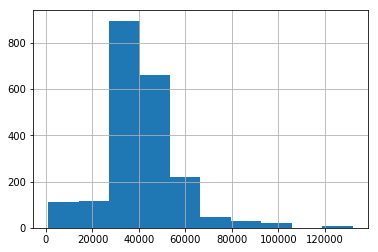

In [248]:
df_data['avg_salaire'].hist()

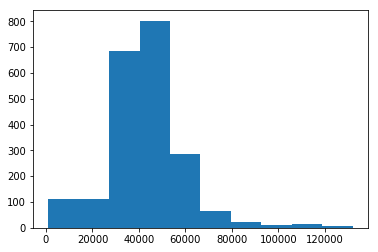

In [247]:
plt.hist(df_data['prediction'])
plt.show()